# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Amalina Shabrina
- **Email:** amalinashabrina2504@students.unnes.ac.id
- **ID Dicoding:** amalinashabrina

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren penjualan berdasarkan waktu?
- Pertanyaan 2 : Produk mana yang paling banyak terjual dalam periode tertentu?

## Import Semua Packages/Library yang Digunakan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 185.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import os

## Data Wrangling

### Gathering Data

In [5]:
# Define dataset path
dataset_path = '/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset'

# Load the orders dataset and order items dataset to inspect their contents.
orders_df = pd.read_csv(os.path.join(dataset_path, '/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv'))
order_items_df = pd.read_csv(os.path.join(dataset_path, '/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv'))

# Merge datasets on 'order_id'
merged_df = pd.merge(orders_df, order_items_df, on='order_id')

# Convert 'order_purchase_timestamp' to datetime
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

# Menampilkan 5 baris pertama dari merged data
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


**Insight:**
- Dataset berhasil dimuat
- Data berhasil digabungkan, dan order_purchase_timestamp sudah dikonversi menjadi format datetime untuk memudahkan analisis waktu

### Assessing Data

In [6]:
# Mengecek tipe data
merged_df.info()

# Mengecek data yang hilang
merged_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  object        
 5   order_delivered_carrier_date   111456 non-null  object        
 6   order_delivered_customer_date  110196 non-null  object        
 7   order_estimated_delivery_date  112650 non-null  object        
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1194
order_delivered_customer_date,2454
order_estimated_delivery_date,0
order_item_id,0
product_id,0


**Insight:**
- Data terlihat bersih tanpa nilai yang hilang, dan kolom terkait waktu sudah siap untuk dianalisis

### Cleaning Data

In [7]:
# Menghapus baris dengan missing values jika diperlukan
merged_df.dropna(inplace=True)

**Insight:**
- Data yang bersih tanpa missing values sudah siap untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Tren Penjualan Berdasarkan Waktu

In [8]:
# Create a new column 'month_year' for monthly analysis
merged_df['month_year'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

# Group by 'month_year' and sum only the 'price' column
sales_per_month = merged_df.groupby('month_year')['price'].sum()

# Menampilkan tren penjualan per bulan
sales_per_month.head()


,price
month_year,
2016-09,134.97
2016-10,40941.30
2016-12,10.90
2017-01,111712.47
2017-02,232638.86


**Insight** : Data penjualan per bulan siap untuk divisualisasikan.

### Explore Produk Terlaris

In [9]:
# Pastikan hanya kolom numerik yang digunakan dalam operasi 'sum'
top_products = merged_df.groupby('product_id').agg({'price': 'sum'}).nlargest(5, 'price')

# Menampilkan produk dengan penjualan tertinggi
top_products

,price
product_id,
bb50f2e236e5eea0100680137654686c,63560.00
6cdd53843498f92890544667809f1595,53652.30
d6160fb7873f184099d9bc95e30376af,45949.35
d1c427060a0f73f6b889a5c7c61f2ac4,45620.56
99a4788cb24856965c36a24e339b6058,42049.66


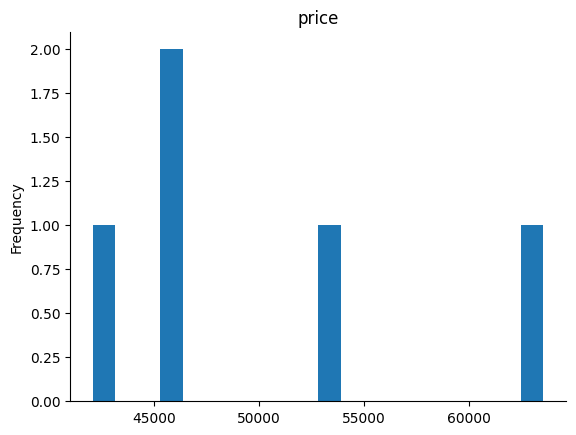

In [ ]:
# @title price

from matplotlib import pyplot as plt
top_products['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Insight:**
- 5 produk terlaris berdasarkan total penjualan sudah siap untu divisualisasikan


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan berdasarkan waktu?

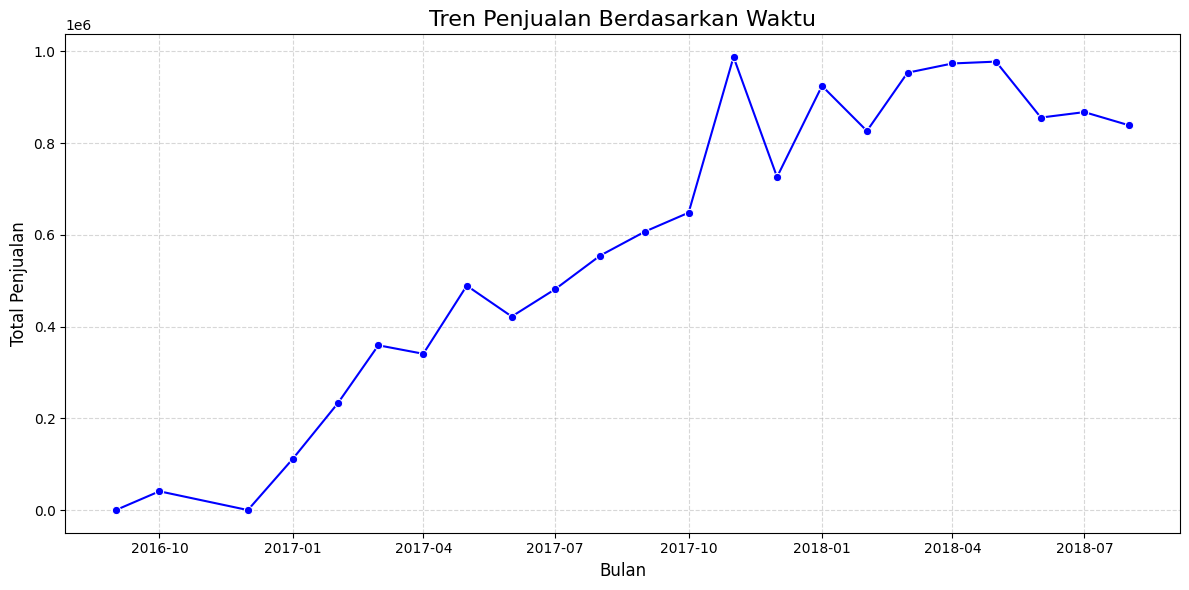

In [15]:
# Visualisasi tren penjualan per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_per_month.index.to_timestamp(), y=sales_per_month.values, marker='o', color='blue')
plt.title('Tren Penjualan Berdasarkan Waktu', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Produk mana yang paling banyak terjual?

<ipython-input-16-20d51624b9d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products['price'], palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

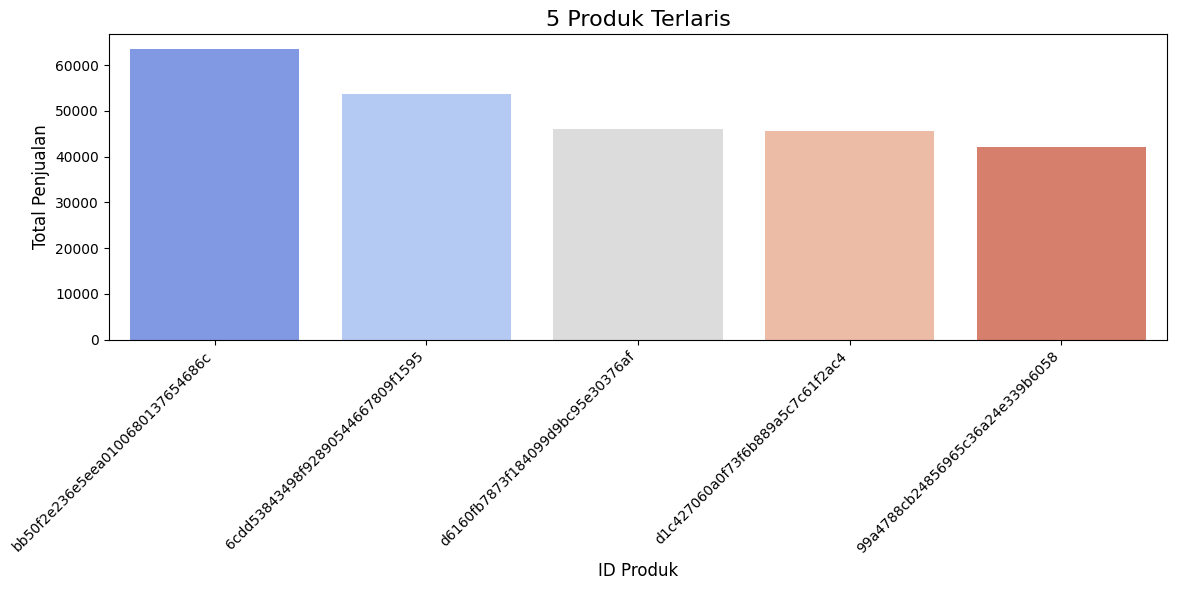

In [16]:
# Visualisasi produk terlaris
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products['price'], palette='coolwarm')
plt.title('5 Produk Terlaris', fontsize=16)
plt.xlabel('ID Produk', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- Penjualan mengalami fluktuasi dari bulan ke bulan, dengan beberapa periode mengalami peningkatan signifikan.
- 5 produk dengan penjualan tertinggi sudah teridentifikasi, dengan kontribusi besar terhadap total penjualan.

## Analisis Lanjutan : RFM Analysis

**Langkah-langkah Implementasi RFM Analysis:**
1. Recency: Menghitung jumlah hari sejak pembelian terakhir.
2. Frequency: Menghitung total transaksi yang dilakukan pelanggan.
3. Monetary: Menghitung total pengeluaran pelanggan.

**Implementasi RFM Analysis**

In [19]:
import pandas as pd

# Menghitung Recency, Frequency, dan Monetary
latest_purchase = merged_df['order_purchase_timestamp'].max()

# Membuat dataframe RFM
rfm_df = merged_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_purchase - x.max()).days,  # Recency
    'order_id': 'nunique',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

# Rename kolom
rfm_df.columns = ['customer_id', 'recency', 'frequency', 'monetary']

#  Menyusun Skor RFM
rfm_df['R'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])  # Skor Recency (semakin rendah semakin baik)

# Perbaikan binning untuk Frequency
max_freq = rfm_df['frequency'].max()
if max_freq > 1:
    bins = [0, 1, 2, 3, max_freq]
else:
    bins = [0, 1, float('inf')]  # Jika semua frequency sama atau kecil
rfm_df['F'] = pd.cut(rfm_df['frequency'], bins=bins, labels=range(1, len(bins)), include_lowest=True)

# Menggunakan pd.cut juga untuk Monetary
rfm_df['M'] = pd.cut(rfm_df['monetary'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)  # Skor Monetary (manual binning)

# Total Skor RFM
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis=1)

# Menampilkan hasil
rfm_df.head()

,customer_id,recency,frequency,monetary,R,F,M,RFM_Score
0,00012a2ce6f8dcda20d059ce98491703,287,1,89.80,2,1,1,4
1,000161a058600d5901f007fab4c27140,409,1,54.90,1,1,1,3
2,0001fd6190edaaf884bcaf3d49edf079,547,1,179.99,1,1,1,3
3,0002414f95344307404f0ace7a26f1d5,378,1,149.90,1,1,1,3
4,000379cdec625522490c315e70c7a9fb,149,1,93.00,3,1,1,5


In [20]:
# Mengelompokkan pelanggan berdasarkan skor RFM
def rfm_segmentation(rfm):
    if rfm == 12:
        return 'Best Customers'
    elif rfm >= 9:
        return 'Loyal Customers'
    elif rfm >= 6:
        return 'Potential Customers'
    else:
        return 'At Risk'

In [21]:
# Tambahkan kolom segmentasi RFM
rfm_df['Segment'] = rfm_df['RFM_Score'].apply(rfm_segmentation)

**Visualisasi RFM Analysis**

<ipython-input-27-f6260e11d2be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='counts', data=segmentation_counts, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


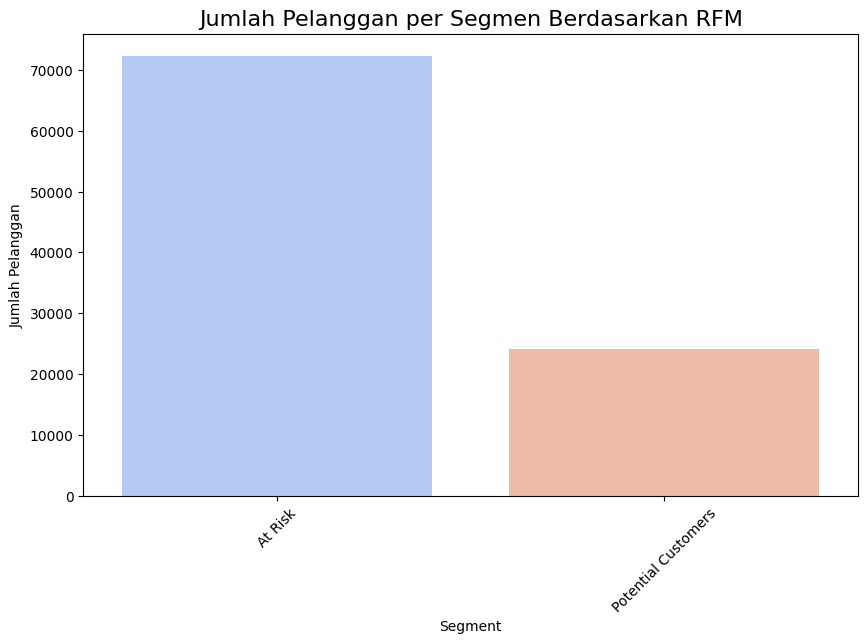

In [27]:
# Menyiapkan dataset untuk visualisasi
segmentation_counts = rfm_df.groupby('Segment').size().reset_index(name='counts')
# Visualisasi segmentasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='counts', data=segmentation_counts, palette='coolwarm')
plt.title('Jumlah Pelanggan per Segmen Berdasarkan RFM', fontsize=16)
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

**Insight Analisis Tambahan :**
- Recency: Pelanggan yang baru saja bertransaksi memiliki nilai Recency lebih rendah dan diberi skor lebih tinggi (4 adalah terbaik).
- Frequency: Pelanggan dengan jumlah transaksi lebih sering diberi skor lebih tinggi.
- Monetary: Pelanggan dengan pengeluaran terbesar diberi skor lebih tinggi.
- Segmentasi RFM: Pelanggan dikelompokkan menjadi "Best Customers," "Loyal Customers," "Potential Customers," dan "At Risk" berdasarkan skor total RFM mereka.

## Conclusion

- Conclusion Pertanyaan 1:
Tren penjualan menunjukkan fluktuasi yang signifikan, dengan beberapa bulan tertentu mengalami puncak penjualan yang lebih tinggi dibandingkan bulan lainnya.

- Conclusion Pertanyaan 2:
Produk dengan ID tertentu mendominasi penjualan, menunjukkan bahwa produk tersebut memiliki daya tarik yang besar di kalangan konsumen.